# Essentia Python examples

This Jupyter notebook demonstrates various typical examples of using TensorFlow models in Essentia in Python.

If you are using this notebook in Google Collab, then you only need to run the following commands to configure Essentia, otherwise proceed with the instructions in the next section.

In [ ]:
# To run this notebook on Google Colab, uncomment and run this code
"""
!pip install essentia-tensorflow
!git clone https://github.com/MTG/essentia-tutorial.git
%cd essentia-tutorial
"""

## Installing essentia-tensorflow in mtgupf/mir-toolbox Docker image 

The default Essentia installation in this Docker does not include algorithms for inference with TensorFlow.

In [1]:
# This would have imported a default essentia installation in this Docker image. Do not run.
#import essentia
#essentia.__file__

'/usr/local/lib/python3/dist-packages/essentia/__init__.py'

Therefore, let's install Essentia with TensorFlow support instead. It depends on a different version of `numpy`, so we will re-install it.

In [4]:
!apt-get -y remove python3-numpy

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following packages will be REMOVED:
  python3-numpy
0 upgraded, 0 newly installed, 1 to remove and 0 not upgraded.
After this operation, 10.9 MB disk space will be freed.
(Reading database ... 23870 files and directories currently installed.)
Removing python3-numpy (1:1.13.3-2ubuntu1) ...


In [5]:
!pip3 install --upgrade pip
!pip3 install essentia-tensorflow

    100% |████████████████████████████████| 1.5MB 958kB/s eta 0:00:01
  Found existing installation: pip 9.0.1
    Not uninstalling pip at /usr/lib/python3/dist-packages, outside environment /usr
     |████████████████████████████████| 382.1 MB 15 kB/s s eta 0:00:01    |██████▏                         | 73.8 MB 15.4 MB/s eta 0:00:21     |██████▎                         | 74.7 MB 15.4 MB/s eta 0:00:21     |███████▍                        | 88.4 MB 4.5 MB/s eta 0:01:05     |██████████▌                     | 125.6 MB 20.9 MB/s eta 0:00:13
     |████████████████████████████████| 14.8 MB 102.3 MB/s eta 0:00:01


In [6]:
!find / -name "*dist-packages*"

/usr/local/lib/python3.6/dist-packages
/usr/local/lib/python3/dist-packages
/usr/lib/python3/dist-packages
/usr/lib/python2.7/dist-packages


In [7]:
import sys
sys.path.insert(0, "/usr/local/lib/python3.6/dist-packages")
print(sys.path)

#from importlib import reload
#reload(essentia)

import essentia
essentia.__file__

['/usr/local/lib/python3.6/dist-packages', '', '/usr/local/lib/python3/dist-packages', '/usr/lib/python36.zip', '/usr/lib/python3.6', '/usr/lib/python3.6/lib-dynload', '/usr/local/lib/python3.6/dist-packages', '/essentia/src/freesound-python', '/essentia/src/mir-eval', '/essentia/src/compmusic', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.6/dist-packages/IPython/extensions', '/root/.ipython']


'/usr/local/lib/python3.6/dist-packages/essentia/__init__.py'

In [8]:
import essentia.standard as es

In [9]:
es.TensorflowPredictMusiCNN?

# Inference with TensorFlow models
Essentia supports inference with TensorFlow models for a variety of MIR tasks.

The following examples complement our [blog posts](https://mtg.github.io/essentia-labs/tensorflow/) and publications [1, 2] covering this topic.

Visit our blog for more details about the framework and 
find the models available at our [website](https://essentia.upf.edu/models/).

References:

[1] Alonso-Jiménez, P., Bogdanov, D., Pons, J., & Serra, X. Tensorflow Audio Models in Essentia. IEEE International Conference on Acoustics, Speech and Signal Processing (ICASSP'20) (pp. 266-270). 2020.

[2] Alonso-Jiménez, P., Bogdanov, D., & Serra, X. Deep embeddings with Essentia models. International Conference on Music Information Retrieval (ISMIR’20), LBD. 2020.

## Auto-tagging

In this example, we predict musical tags for a music track using the `MusiCNN` model and plot the resulting tag activations over time (tag-gram).

The first step is to download the model and the metadata file attached to it from our website.

In [3]:
!curl -SLO https://essentia.upf.edu/models/autotagging/msd/msd-musicnn-1.pb
!curl -SLO https://essentia.upf.edu/models/autotagging/msd/msd-musicnn-1.json

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 3123k  100 3123k    0     0  23.6M      0 --:--:-- --:--:-- --:--:-- 23.6M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2100  100  2100    0     0  43750      0 --:--:-- --:--:-- --:--:-- 44680


The metadata file contains information about the model such as the name of the most relevant layers, the classes it can predict, the data used for training, or evaluation metrics when available.

In [4]:
import json

musicnn_metadata = json.load(open('msd-musicnn-1.json', 'r'))

for k, v in musicnn_metadata.items():
    print('{}: {}'.format(k , v))

name: MSD MusiCNN
type: auto-tagging
link: https://essentia.upf.edu/models/autotagging/msd/msd-musicnn-1.pb
version: 1
description: prediction of the top-50 tags in the dataset
author: Pablo Alonso
email: pablo.alonso@upf.edu
release_date: 2020-03-31
framework: tensorflow
framework_version: 1.15.0
classes: ['rock', 'pop', 'alternative', 'indie', 'electronic', 'female vocalists', 'dance', '00s', 'alternative rock', 'jazz', 'beautiful', 'metal', 'chillout', 'male vocalists', 'classic rock', 'soul', 'indie rock', 'Mellow', 'electronica', '80s', 'folk', '90s', 'chill', 'instrumental', 'punk', 'oldies', 'blues', 'hard rock', 'ambient', 'acoustic', 'experimental', 'female vocalist', 'guitar', 'Hip-Hop', '70s', 'party', 'country', 'easy listening', 'sexy', 'catchy', 'funk', 'electro', 'heavy metal', 'Progressive rock', '60s', 'rnb', 'indie pop', 'sad', 'House', 'happy']
model_types: ['frozen_model']
dataset: {'name': 'The Millon Song Dataset', 'citation': 'http://millionsongdataset.com/', 'si

We have specific algorithms to perform predictions by each model. [TensorflowPredictMusiCNN](https://essentia.upf.edu/reference/std_TensorflowPredictMusiCNN.html) is tailored to operate with `MusiCNN` and `MusiCNN-based` models as we will see later on. 



You can go to the reference page and read the algorithm's documentation to check the algorithm input requirements.

`TensorflowPredictMusiCNN` expects audio with a sample rate of 16kHz as input. We can obtain it using `MonoLoader` algorithm modifying its `sampleRate` parameter accordingly.


Let's make some predictions now!

In [6]:
sr = 16000
audio = es.MonoLoader(filename='../../../test/audio/recorded/techno_loop.wav', sampleRate=sr)()

musicnn_preds = es.TensorflowPredictMusiCNN(graphFilename='msd-musicnn-1.pb')(audio)

Finally we can get the classes from the metadata to label the $y$ axis of the tag-gram.

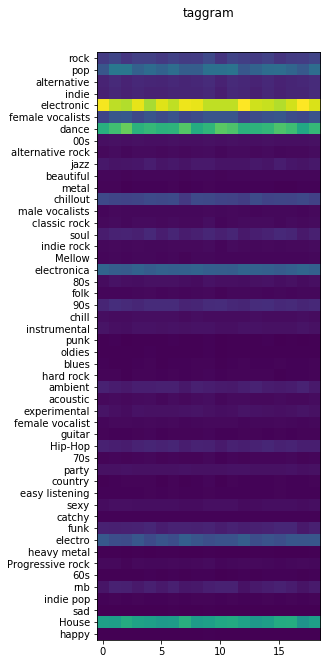

In [7]:
classes = musicnn_metadata['classes']

plt.matshow(musicnn_preds.T)
plt.title('taggram')
plt.yticks(np.arange(len(classes)), classes)
plt.gca().xaxis.set_ticks_position('bottom')
plt.show()

We can see that the model produced 19 predictions ($x$ axis). This is because by default `MusiCNN` operates on 3-second patches with an overlap of 1.5 seconds and our example lasts 30 seconds.

## Transfer learning classifiers

In this example, we are learning how to use our [transfer learning classifiers](https://essentia.upf.edu/models/classifiers/).

These classifiers were trained on top of bigger models such as `MusiCNN` to leverage the audio representations learned on larger amounts of data. For clarity, the classifiers are named following this convention: `<targer-task>-<source-task>-<version>`. So `danceability-musicnn-msd-2.pb` is a `danceability` classifier trained on top of the `musicnn-msd` model and it is the release version number 2. 

The algorithm to use is determined by the `source-task`, so again we should use `TensorFlowPredictMusiCNN`.

In [8]:
!curl -SLO https://essentia.upf.edu/models/classifiers/danceability/danceability-musicnn-msd-2.pb
!curl -SLO https://essentia.upf.edu/models/classifiers/danceability/danceability-musicnn-msd-2.json

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 3163k  100 3163k    0     0  25.5M      0 --:--:-- --:--:-- --:--:-- 25.7M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1736  100  1736    0     0   7890      0 --:--:-- --:--:-- --:--:--  7855


In [9]:
danceability_preds = es.TensorflowPredictMusiCNN(graphFilename='danceability-musicnn-msd-2.pb')(audio)

danceability_metadata = json.load(open('danceability-musicnn-msd-2.json', 'r'))['classes']

# Average predictions over the time axis
danceability_preds = np.mean(danceability_preds, axis=0)

print('{}: {}%'.format(danceability_metadata[0] , danceability_preds[0] * 100))

danceable: 100.0%


## Tempo estimation
We provide tempo estimation through the `TempoCNN` models. In this case, we do not need any metadata information as this model is not returning class probabilities but the most likely BPM value directly.

In [10]:
!curl -SLO https://essentia.upf.edu/models/tempo/tempocnn/deeptemp-k16-3.pb

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1289k  100 1289k    0     0  14.8M      0 --:--:-- --:--:-- --:--:-- 14.8M


In [11]:
sr = 11025
audio_11khz = es.MonoLoader(filename='../../../test/audio/recorded/techno_loop.wav', sampleRate=sr)()

global_bpm, local_bpm, local_probs = es.TempoCNN(graphFilename='deeptemp-k16-3.pb')(audio_11khz)

print('song BPM: {}'.format(global_bpm))

song BPM: 125.0


We can plot a slice of the waveform on top of a grid with the estimated tempo to get visual verification

Text(0.5, 1.0, 'Audio waveform on top of a tempo grid')

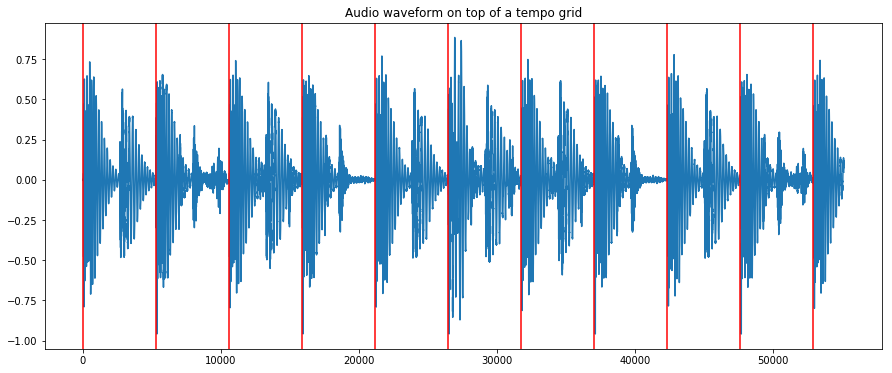

In [18]:
duration = 5  # seconds
audio_slice = audio_11khz[:sr * duration]

plt.plot(audio_slice)
markers = np.arange(0, len(audio_slice), sr / (global_bpm / 60))
for marker in markers:
    plt.axvline(x=marker, color='red')
    
plt.title("Audio waveform on top of a tempo grid")

`TempoCNN` operates on audio slices of 12 seconds with an overlap of 6 seconds by default. Additionally, the algorithm outputs the local estimations along with their probabilities. The global value is computed by majority voting by default. However, this method is only recommended when a constant tempo can be assumed.

In [19]:
print('local BPM: {}'.format(local_bpm))
print('local probabilities: {}'.format(local_probs))

local BPM: [125. 125. 125. 125.]
local probabilities: [0.9679363  0.96005017 0.9681525  0.96270114]


You can notice how the model gives very high probabilities to all the estimations.
This is because we chose an example with a very tight beat. 

## Embedding extraction

In the next example, we are computing embeddings with the `VGGish` model.

In [20]:
!curl -SLO https://essentia.upf.edu/models/feature-extractors/vggish/audioset-vggish-3.pb

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  275M  100  275M    0     0  34.8M      0  0:00:07  0:00:07 --:--:-- 34.9M


In [21]:
sr = 16000
audio = es.MonoLoader(filename='../../../test/audio/recorded/techno_loop.wav', sampleRate=sr)()

vggish_preds = es.TensorflowPredictVGGish(graphFilename='audioset-vggish-3.pb',
                                          output='model/vggish/embeddings')(audio)

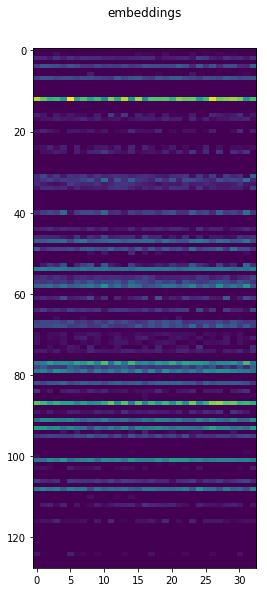

In [22]:
plt.matshow(vggish_preds.T, aspect=.6)
plt.title('embeddings')
plt.gca().xaxis.set_ticks_position('bottom')

## Extracting embeddings from other models

In every TensorFlow prediction algorithm, you can choose the layer of the model to retrieve. One application of this is to use any model as an embedding extractor.

For some models, we even suggest a layer that could be used as embeddings.
Let's see the information about the outputs for the `MusiCNN` model we loaded before.

In [24]:
print('Model outputs:\n')
for output in musicnn_metadata['schema']['outputs']:
    for k, v in output.items():
        print('{}: {}'.format(k , v))
    print()

Model outputs:

name: model/Sigmoid
type: float
shape: [1, 50]
op: Sigmoid

name: model/dense_1/BiasAdd
type: float
shape: [1, 50]
op: fully connected
description: logits

name: model/dense/BiasAdd
type: float
shape: [1, 200]
op: fully connected
description: embeddings



From this we learn that the output of the penultimate dense layer is proposed as embeddings.
We can extract it by setting the `output` parameter.

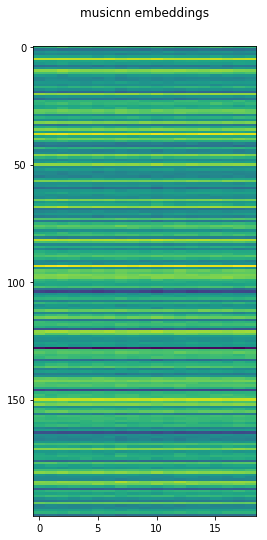

In [26]:
musicnn_embs = es.TensorflowPredictMusiCNN(graphFilename='msd-musicnn-1.pb',
                                           output='model/dense/BiasAdd')(audio)

plt.matshow(musicnn_embs.T, aspect=.2)
plt.title('musicnn embeddings')
plt.gca().xaxis.set_ticks_position('bottom')